<a href="https://colab.research.google.com/github/tengkumuazabs/my-portfolio/blob/main/python-projects/Predict_the_cancellation_of_hotel_bookings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gdown

In [ ]:
!gdown 1RpDArZ8SphYYvjK1la1HgAKCVVwnbKKX

Downloading...
From: https://drive.google.com/uc?id=1RpDArZ8SphYYvjK1la1HgAKCVVwnbKKX
To: /content/hotel_bookings.csv
100% 16.8M/16.8M [00:00<00:00, 43.2MB/s]


In [ ]:
df=pd.read_csv('hotel_bookings.csv')

In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
df.head(30)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,7/3/2015
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,7/3/2015
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.00,0,0,Check-Out,7/3/2015
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.00,0,1,Check-Out,7/3/2015
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.00,0,1,Canceled,5/6/2015
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.50,0,0,Canceled,4/22/2015


In [ ]:
# perform data cleaning

In [ ]:
df.shape

(119390, 32)

In [ ]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
df.drop(['agent','company'],axis=1,inplace=True)

In [ ]:
df.country.value_counts().index[0]

'PRT'

In [ ]:
df.country.fillna(df.country.value_counts().index[0],inplace=True)

In [ ]:
df.fillna(0,inplace=True)

In [ ]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [ ]:
filter1 = (df.children==0) & (df.adults==0) & (df.babies==0)

In [ ]:
df[filter1]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,...,I,1,No Deposit,0,Transient-Party,0.00,0,0,Check-Out,10/6/2015
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,...,I,0,No Deposit,0,Transient,0.00,0,0,Check-Out,10/12/2015
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,...,C,0,No Deposit,0,Transient-Party,0.00,0,0,Check-Out,11/23/2015
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,...,A,1,No Deposit,122,Transient-Party,0.00,0,0,Check-Out,1/4/2016
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,...,C,1,No Deposit,122,Transient-Party,0.00,0,0,Check-Out,1/5/2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,...,A,1,No Deposit,0,Transient,100.80,0,0,Check-Out,6/30/2017
115091,City Hotel,0,1,2017,June,26,30,0,1,0,...,K,0,No Deposit,0,Transient,0.00,1,1,Check-Out,7/1/2017
116251,City Hotel,0,44,2017,July,28,15,1,1,0,...,K,2,No Deposit,0,Transient,73.80,0,0,Check-Out,7/17/2017
116534,City Hotel,0,2,2017,July,28,15,2,5,0,...,K,1,No Deposit,0,Transient-Party,22.86,0,1,Check-Out,7/22/2017


In [ ]:
data=df[~filter1]

In [ ]:
df.shape

(119390, 30)

In [ ]:
data.shape

(119210, 30)

In [ ]:
# where do the guests come from

In [ ]:
data.is_canceled.unique()

array([0, 1])

In [ ]:
data[data.is_canceled==0].country.value_counts().sum()

75011

In [ ]:
len(data[data.is_canceled==0])

75011

In [ ]:
data[data.is_canceled==0].country.value_counts()/75011

PRT    0.285265
GBR    0.128888
FRA    0.112890
ESP    0.085094
DEU    0.080881
         ...   
BHR    0.000013
DJI    0.000013
MLI    0.000013
NPL    0.000013
FRO    0.000013
Name: country, Length: 165, dtype: float64

In [ ]:
country_wise_data=data[data.is_canceled==0].country.value_counts().reset_index()

In [ ]:
country_wise_data.columns=['country','no_of_guests']

In [ ]:
country_wise_data

,country,no_of_guests
0,PRT,21398
1,GBR,9668
2,FRA,8468
3,ESP,6383
4,DEU,6067
...,...,...
160,BHR,1
161,DJI,1
162,MLI,1
163,NPL,1


In [ ]:
!pip install chart_studio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 2.3 MB/s eta 0:00:00


In [ ]:
import plotly
import chart_studio.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
init_notebook_mode(connected=True)

In [ ]:
country_wise_data.columns

Index(['country', 'no_of_guests'], dtype='object')

In [ ]:
map_guests=px.choropleth(country_wise_data,
              locations=country_wise_data.country,
              color=country_wise_data.no_of_guests,
              hover_name=country_wise_data.country,
              title='home country of guests')

In [ ]:
map_guests.show(renderer='colab')

In [ ]:
# how much do guests pay for a room per night

In [ ]:
data2=data[data.is_canceled==0]

In [ ]:
data2.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
data2.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out,9/6/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out,9/7/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out,9/7/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out,9/7/2017
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,A,0,No Deposit,0,Transient,151.20,0,2,Check-Out,9/7/2017


Text(0, 0.5, 'price in eur')

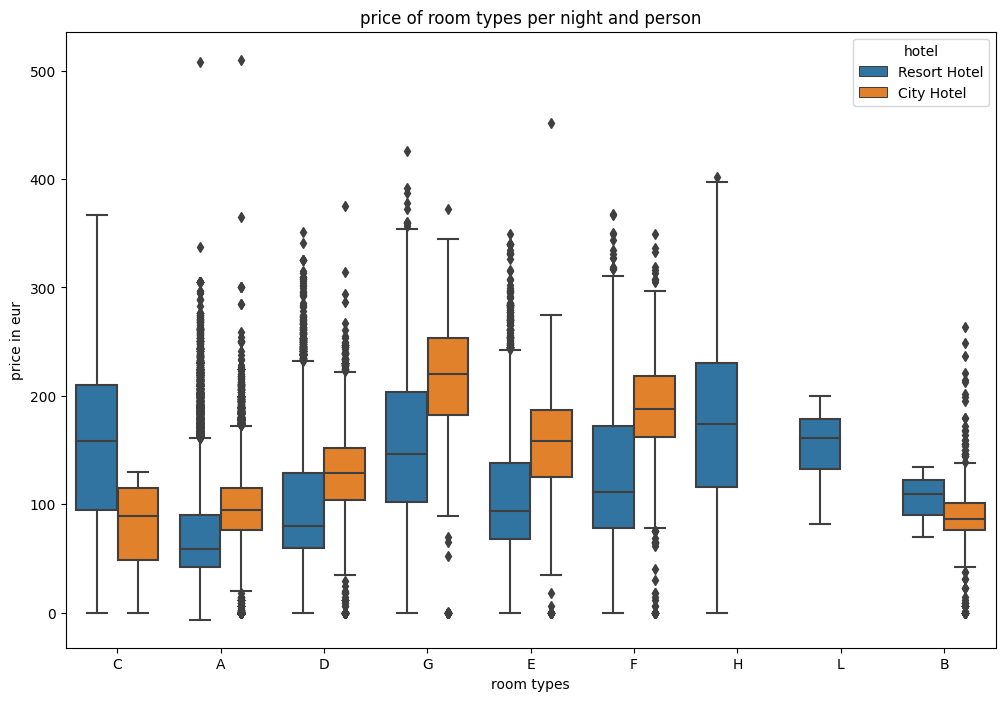

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(x='reserved_room_type',y='adr',hue='hotel',data=data2)

plt.title('price of room types per night and person')
plt.xlabel('room types')
plt.ylabel('price in eur')

In [ ]:
# which are the busiest month

In [ ]:
data.hotel.unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [ ]:
data_resort=data[(data.hotel=='Resort Hotel') & (data.is_canceled==0)]
data_city=data[(data.hotel=='City Hotel') & (data.is_canceled==0)]

In [ ]:
data_resort.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [ ]:
rush_resort=data_resort.arrival_date_month.value_counts().reset_index()
rush_resort.columns=['month','no_of_guest']
rush_resort

,month,no_of_guest
0,August,3257
1,July,3137
2,October,2575
3,March,2571
4,April,2550
5,May,2535
6,February,2308
7,September,2102
8,June,2037
9,December,2014


In [ ]:
rush_city=data_city.arrival_date_month.value_counts().reset_index()
rush_city.columns=['month','no_of_guest']
rush_city

,month,no_of_guest
0,August,5367
1,July,4770
2,May,4568
3,June,4358
4,October,4326
5,September,4283
6,March,4049
7,April,4010
8,February,3051
9,November,2676


In [ ]:
final_rush=rush_resort.merge(rush_city,on='month')

In [ ]:
final_rush.columns=['month','no_of_guest_in_resort','no_of_guest_in_city']

In [ ]:
final_rush

,month,no_of_guest_in_resort,no_of_guest_in_city
0,August,3257,5367
1,July,3137,4770
2,October,2575,4326
3,March,2571,4049
4,April,2550,4010
5,May,2535,4568
6,February,2308,3051
7,September,2102,4283
8,June,2037,4358
9,December,2014,2377


In [ ]:
!pip install sorted-months-weekdays
!pip install sort_dataframebY_monthorweek

  Preparing metadata (setup.py) ... done
  Created wheel for sorted-months-weekdays: filename=sorted_months_weekdays-0.2-py3-none-any.whl size=3224 sha256=53c393a3a32d76b51e2dca6a19c9bae1cb13d8a7d0e2ba3930321cd15b90e7e9
  Stored in directory: /root/.cache/pip/wheels/bd/b4/f6/2c29a96668a9a13a568134857fd7b7a5186261f00f1d35661c
Successfully built sorted-months-weekdays
  Preparing metadata (setup.py) ... done
  Created wheel for sort_dataframebY_monthorweek: filename=sort_dataframeby_monthorweek-0.4-py3-none-any.whl size=3421 sha256=8378167393e3249165995757fb8d0448ef035297ba4ff8ccc676da29501789f3
  Stored in directory: /root/.cache/pip/wheels/6b/fd/39/06eaac8d65d641f9f50856a48b57a5ec8351be2874beff01ec
Successfully built sort_dataframebY_monthorweek


In [ ]:
import sort_dataframeby_monthorweek as sd

In [ ]:
finals_rush=sd.Sort_Dataframeby_Month(final_rush,'month')

In [ ]:
final_rush.columns

Index(['month', 'no_of_guest_in_resort', 'no_of_guest_in_city'], dtype='object')

In [ ]:
fig=px.line(final_rush,x='month',y=['no_of_guest_in_resort', 'no_of_guest_in_city'])
fig.show(renderer='colab')

In [ ]:
# which month has highest adr

In [ ]:
data=sd.Sort_Dataframeby_Month(data,'arrival_date_month')

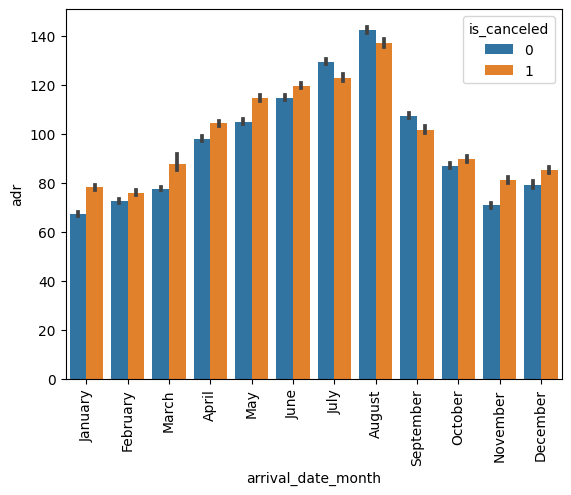

In [ ]:
sns.barplot(x='arrival_date_month',y='adr',data=data, hue='is_canceled')
plt.xticks(rotation='vertical')
plt.show()

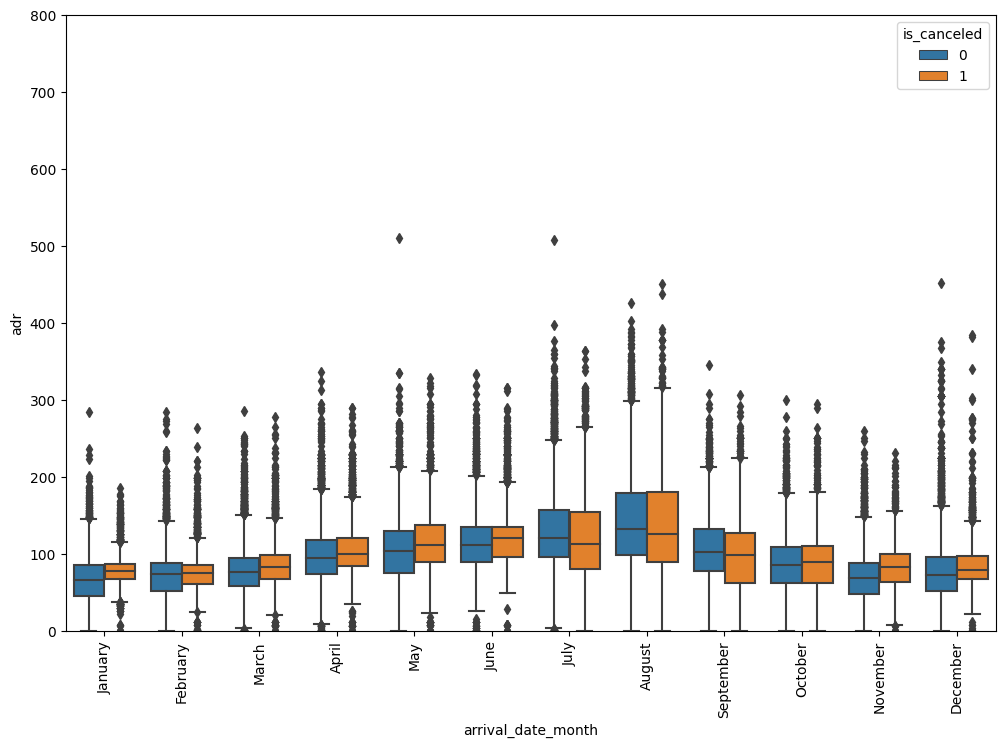

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(x='arrival_date_month',y='adr',data=data,hue='is_canceled')
plt.xticks(rotation='vertical')

plt.ylim(0,800)
plt.show()

In [ ]:
# analyse whether bookings were made only for weekdays or for weekends or for both

In [ ]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
pd.crosstab(index=data['stays_in_weekend_nights'],columns=data['stays_in_week_nights'])

stays_in_week_nights,0,1,2,3,4,5,6,7,8,9,...,24,25,26,30,32,33,34,40,42,50
stays_in_weekend_nights,,,,,,,,,,,,,,,,,,,,,
0,645,16436,17949,11557,4478,830,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4569,7325,8976,6150,2407,1188,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2358,6531,6745,4534,2658,8648,847,446,391,81,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,308,300,397,131,61,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,94,347,181,132,86,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data2.stays_in_week_nights.unique()

array([ 1,  2,  5,  4,  3, 10, 20,  0, 30,  8,  6,  7, 25, 15, 17,  9, 40,
       13, 14, 12, 16, 11, 32, 19, 26, 50, 21, 34, 42, 18, 33])

In [ ]:
data2.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'weekend_or_weekday'],
      dtype='object')

In [ ]:
def week_function(row):
  feature1='stays_in_weekend_nights'
  feature2='stays_in_week_nights'

  if row[feature2] == 0 and row[feature1] > 0:
    return 'stay_just_weekend'

  if row[feature2] > 0 and row[feature1] == 0:
    return 'stay_just_weekdays'

  if row[feature2] > 0 and row[feature1] > 0:
    return 'stay_both_weekdays_weekend'

  else:
    return 'undefined_data'

In [ ]:
data2['weekend_or_weekday']=data2.apply(week_function, axis=1)

In [ ]:
data2.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,weekend_or_weekday
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015,undefined_data
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015,undefined_data
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75.0,0,0,Check-Out,7/2/2015,stay_just_weekdays
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75.0,0,0,Check-Out,7/2/2015,stay_just_weekdays
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,0,Transient,98.0,0,1,Check-Out,7/3/2015,stay_just_weekdays


In [ ]:
data2.weekend_or_weekday.value_counts()

stay_both_weekdays_weekend    37551
stay_just_weekdays            31788
stay_just_weekend              5050
undefined_data                  622
Name: weekend_or_weekday, dtype: int64

In [ ]:
type(sd)

module

In [ ]:
data2=sd.Sort_Dataframeby_Month(data2,'arrival_date_month')

In [ ]:
data2.groupby(['arrival_date_month','weekend_or_weekday']).size()

arrival_date_month  weekend_or_weekday        
April               stay_both_weekdays_weekend    3627
                    stay_just_weekdays            2559
                    stay_just_weekend              344
                    undefined_data                  30
August              stay_both_weekdays_weekend    4929
                    stay_just_weekdays            3137
                    stay_just_weekend              509
                    undefined_data                  49
December            stay_both_weekdays_weekend    1901
                    stay_just_weekdays            2123
                    stay_just_weekend              298
                    undefined_data                  69
February            stay_both_weekdays_weekend    2438
                    stay_just_weekdays            2514
                    stay_just_weekend              360
                    undefined_data                  47
January             stay_both_weekdays_weekend    1550
                  

In [ ]:
grouped_data=data2.groupby(['arrival_date_month','weekend_or_weekday']).size().unstack().reset_index()

In [ ]:
grouped_data

weekend_or_weekday,arrival_date_month,stay_both_weekdays_weekend,stay_just_weekdays,stay_just_weekend,undefined_data
0,April,3627,2559,344,30
1,August,4929,3137,509,49
2,December,1901,2123,298,69
3,February,2438,2514,360,47
4,January,1550,2125,393,47
5,July,4570,2818,462,57
6,June,3241,2685,433,36
7,March,3151,3060,359,50
8,May,3442,3017,570,74
9,November,2117,2214,261,59


In [ ]:
sorted_data=sd.Sort_Dataframeby_Month(grouped_data,'arrival_date_month')

In [ ]:
sorted_data.set_index('arrival_date_month',inplace=True)

In [ ]:
sorted_data

,stay_both_weekdays_weekend,stay_just_weekdays,stay_just_weekend,undefined_data
arrival_date_month,,,,
January,1550,2125,393,47
February,2438,2514,360,47
March,3151,3060,359,50
April,3627,2559,344,30
May,3442,3017,570,74
June,3241,2685,433,36
July,4570,2818,462,57
August,4929,3137,509,49
September,3192,2692,479,22


<Axes: xlabel='arrival_date_month'>

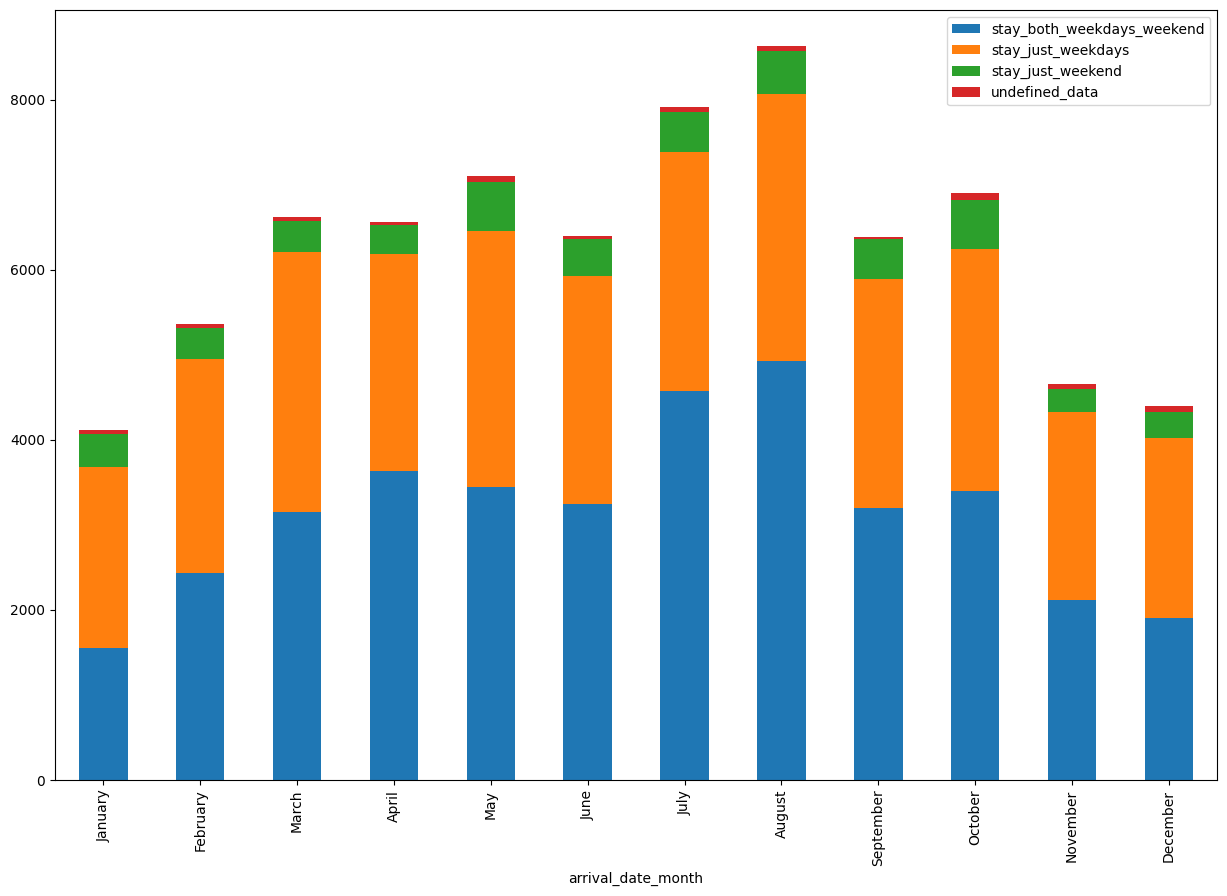

In [ ]:
sorted_data.plot(kind='bar',stacked=True,figsize=(15,10))

In [ ]:
# how to create some more features

In [ ]:
data2.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'weekend_or_weekday'],
      dtype='object')

In [ ]:
def family(row):
  if (row.adults>0) and (row.children>0 or row.babies>0):
    return 1
  else:
    return 0

In [ ]:
data['is_family']=data.apply(family,axis=1)

In [ ]:
data['total_customer']=data.adults+data.babies+data.children

In [ ]:
data['total_nights']=data.stays_in_week_nights+data.stays_in_weekend_nights

In [ ]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,is_family,total_customer,total_nights
0,Resort Hotel,0,109,2016,January,1,1,0,1,2,...,0,Transient-Party,59.94,0,1,Check-Out,1/2/2016,0,2.0,1
1,Resort Hotel,0,109,2016,January,1,1,0,1,2,...,0,Transient-Party,116.10,1,1,Check-Out,1/2/2016,1,4.0,1
2,Resort Hotel,1,2,2016,January,1,1,0,1,2,...,0,Transient,89.00,0,1,No-Show,1/1/2016,0,2.0,1
3,Resort Hotel,0,88,2016,January,1,1,0,2,2,...,0,Transient,73.46,0,2,Check-Out,1/3/2016,0,2.0,2
4,Resort Hotel,1,20,2016,January,1,1,0,2,2,...,0,Transient,119.00,0,0,Canceled,12/22/2015,1,4.0,2


In [ ]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'is_family',
       'total_customer', 'total_nights'],
      dtype='object')

In [ ]:
data.deposit_type.unique()

array(['No Deposit', 'Non Refund', 'Refundable'], dtype=object)

In [ ]:
dict1={'No Deposit':0,
       'Non Refund':1,
       'Refundable':0}

In [ ]:
data['deposit_given']=data.deposit_type.map(dict1)

In [ ]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'is_family',
       'total_customer', 'total_nights', 'deposit_given'],
      dtype='object')

In [ ]:
# how to apply feature encoding on the data

In [ ]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,is_family,total_customer,total_nights,deposit_given
0,Resort Hotel,0,109,2016,January,1,1,0,1,2,...,Transient-Party,59.94,0,1,Check-Out,1/2/2016,0,2.0,1,0
1,Resort Hotel,0,109,2016,January,1,1,0,1,2,...,Transient-Party,116.10,1,1,Check-Out,1/2/2016,1,4.0,1,0
2,Resort Hotel,1,2,2016,January,1,1,0,1,2,...,Transient,89.00,0,1,No-Show,1/1/2016,0,2.0,1,0
3,Resort Hotel,0,88,2016,January,1,1,0,2,2,...,Transient,73.46,0,2,Check-Out,1/3/2016,0,2.0,2,0
4,Resort Hotel,1,20,2016,January,1,1,0,2,2,...,Transient,119.00,0,0,Canceled,12/22/2015,1,4.0,2,0


In [ ]:
data.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
days_in_waiting_list              

In [ ]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'is_family',
       'total_customer', 'total_nights', 'deposit_given'],
      dtype='object')

In [ ]:
cat_features=[col for col in data.columns if data[col].dtype=='object']

In [ ]:
cat_features

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date']

In [ ]:
num_features=[col for col in data.columns if data[col].dtype!='object']

In [ ]:
num_features

['is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'is_family',
 'total_customer',
 'total_nights',
 'deposit_given']

In [ ]:
data_cat=data[cat_features]

In [ ]:
data_cat.columns

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status',
       'reservation_status_date'],
      dtype='object')

In [ ]:
data.groupby('hotel').is_canceled.mean().to_dict()

{'City Hotel': 0.4178593534858457, 'Resort Hotel': 0.27767373336329815}

In [ ]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
data_cat['cancellation']=data.is_canceled

In [ ]:
data_cat.head()

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date,cancellation
0,Resort Hotel,January,BB,RUS,Online TA,TA/TO,A,D,No Deposit,Transient-Party,Check-Out,1/2/2016,0
1,Resort Hotel,January,BB,RUS,Online TA,TA/TO,H,H,No Deposit,Transient-Party,Check-Out,1/2/2016,0
2,Resort Hotel,January,BB,PRT,Online TA,TA/TO,D,D,No Deposit,Transient,No-Show,1/1/2016,1
3,Resort Hotel,January,HB,ARG,Online TA,TA/TO,A,D,No Deposit,Transient,Check-Out,1/3/2016,0
4,Resort Hotel,January,BB,PRT,Online TA,TA/TO,G,G,No Deposit,Transient,Canceled,12/22/2015,1


In [ ]:
cols=data_cat.columns

In [ ]:
cols=cols[0:-1]

In [ ]:
for col in cols:
  dict2=data_cat.groupby(col).cancellation.mean().to_dict()
  data_cat[col]=data_cat[col].map(dict2)

In [ ]:
data_cat.head()

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date,cancellation
0,0.277674,0.305016,0.374106,0.379365,0.36759,0.410598,0.391567,0.251373,0.28402,0.254504,0.0,0.048276,0
1,0.277674,0.305016,0.374106,0.379365,0.36759,0.410598,0.407654,0.352528,0.28402,0.254504,0.0,0.048276,0
2,0.277674,0.305016,0.374106,0.562958,0.36759,0.410598,0.318108,0.251373,0.28402,0.407864,1.0,0.101010,1
3,0.277674,0.305016,0.344653,0.252336,0.36759,0.410598,0.391567,0.251373,0.28402,0.407864,0.0,0.108247,0
4,0.277674,0.305016,0.374106,0.562958,0.36759,0.410598,0.364723,0.306002,0.28402,0.407864,1.0,0.684211,1


In [ ]:
# handle outliers

In [ ]:
data[num_features]

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_family,total_customer,total_nights,deposit_given
0,0,109,2016,1,1,0,1,2,0.0,0,...,0,0,0,59.94,0,1,0,2.0,1,0
1,0,109,2016,1,1,0,1,2,2.0,0,...,0,0,0,116.10,1,1,1,4.0,1,0
2,1,2,2016,1,1,0,1,2,0.0,0,...,0,0,0,89.00,0,1,0,2.0,1,0
3,0,88,2016,1,1,0,2,2,0.0,0,...,0,0,0,73.46,0,2,0,2.0,2,0
4,1,20,2016,1,1,0,2,2,2.0,0,...,0,0,0,119.00,0,0,1,4.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119205,0,173,2016,53,26,3,8,2,1.0,0,...,0,4,0,117.82,0,1,1,3.0,11,0
119206,0,17,2016,53,30,2,5,2,0.0,0,...,0,0,0,90.34,0,1,0,2.0,7,0
119207,0,107,2016,53,31,2,5,2,0.0,0,...,0,0,0,103.57,0,0,0,2.0,7,0
119208,0,310,2016,53,27,2,10,2,0.0,0,...,0,2,0,68.57,0,2,0,2.0,12,0


In [ ]:
dataframe=pd.concat([data_cat,data[num_features]],axis=1)

In [ ]:
dataframe.columns

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status',
       'reservation_status_date', 'cancellation', 'is_canceled', 'lead_time',
       'arrival_date_year', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'is_family', 'total_customer',
       'total_nights', 'deposit_given'],
      dtype='object')

In [ ]:
dataframe.drop('cancellation',axis=1,inplace=True)

In [ ]:
dataframe.head(3)

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,...,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_family,total_customer,total_nights,deposit_given
0,0.277674,0.305016,0.374106,0.379365,0.36759,0.410598,0.391567,0.251373,0.28402,0.254504,...,0,0,0,59.94,0,1,0,2.0,1,0
1,0.277674,0.305016,0.374106,0.379365,0.36759,0.410598,0.407654,0.352528,0.28402,0.254504,...,0,0,0,116.10,1,1,1,4.0,1,0
2,0.277674,0.305016,0.374106,0.562958,0.36759,0.410598,0.318108,0.251373,0.28402,0.407864,...,0,0,0,89.00,0,1,0,2.0,1,0


<Axes: xlabel='lead_time', ylabel='Density'>

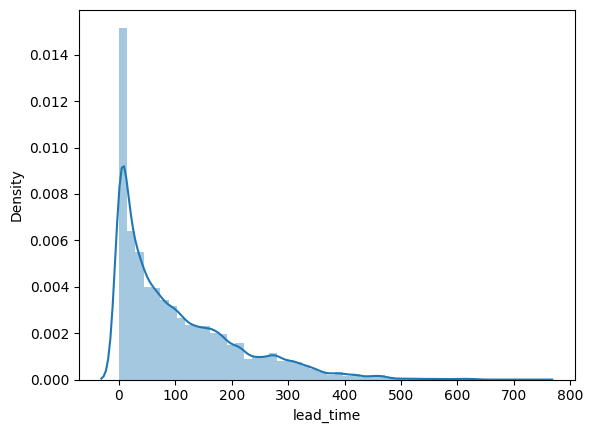

In [ ]:
sns.distplot(dataframe.lead_time)

In [ ]:
def handle_outliers(col):
  dataframe[col]=np.log1p(dataframe[col])

In [ ]:
handle_outliers('lead_time')

<Axes: xlabel='lead_time', ylabel='Density'>

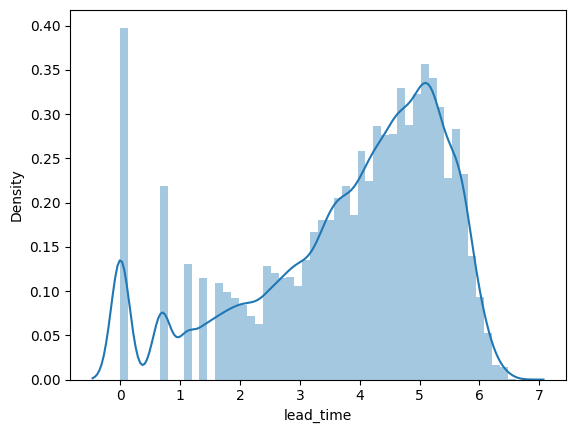

In [ ]:
sns.distplot(dataframe.lead_time)

<Axes: xlabel='adr', ylabel='Density'>

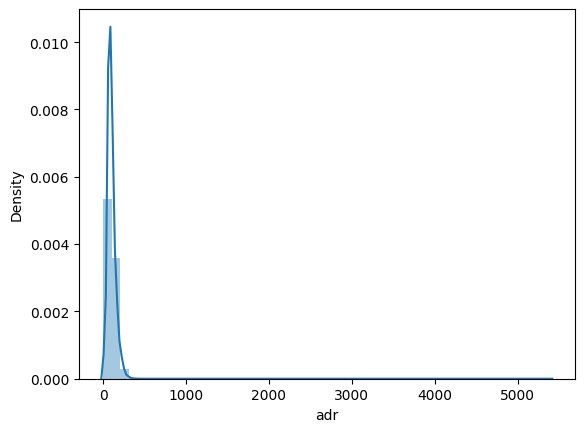

In [ ]:
sns.distplot(dataframe.adr)

In [ ]:
dataframe[dataframe.adr<0]

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,...,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_family,total_customer,total_nights,deposit_given
14989,0.277674,0.322277,0.374106,0.20231,0.611086,0.174868,0.391567,0.352528,0.28402,0.254504,...,2,2,0,-6.38,0,0,0,2.0,10,0


In [ ]:
handle_outliers('adr')

In [ ]:
dataframe['adr'].isnull().sum()

1

In [ ]:
### now why this missing value , as we have already deal with the missing values..'
### bcz we have negative value in 'adr' feature as '-6.38'  ,& if we apply ln(1+x) , we will get 'nan'
## bcz log wont take negative values..

<Axes: xlabel='adr', ylabel='Density'>

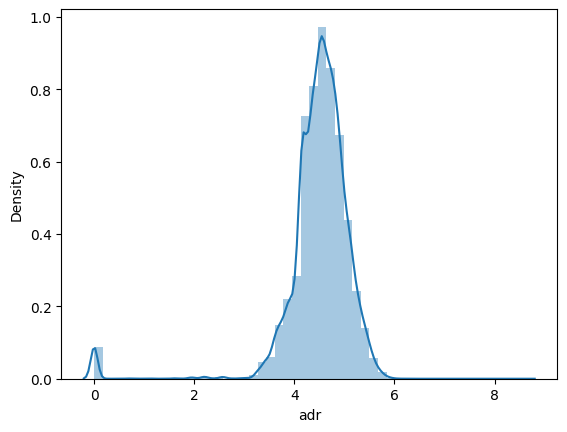

In [ ]:
sns.distplot(dataframe.adr.dropna())

In [ ]:
# select important features using correlation and univariate analysis

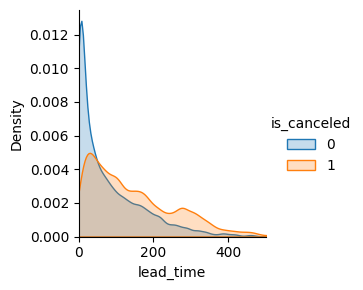

In [ ]:
sns.FacetGrid(data,hue='is_canceled',xlim=(0,500)).map(sns.kdeplot,'lead_time',shade=True).add_legend()

In [ ]:
corr=dataframe.corr()

In [ ]:
corr.is_canceled.sort_values(ascending=False)

reservation_status                1.000000
is_canceled                       1.000000
reservation_status_date           0.488307
deposit_type                      0.481530
deposit_given                     0.481507
country                           0.357232
lead_time                         0.320075
market_segment                    0.267006
assigned_room_type                0.201570
distribution_channel              0.177167
hotel                             0.137082
customer_type                     0.136617
previous_cancellations            0.110139
adr                               0.081660
reserved_room_type                0.072769
arrival_date_month                0.069886
adults                            0.058182
days_in_waiting_list              0.054301
meal                              0.050584
total_customer                    0.044826
stays_in_week_nights              0.025542
total_nights                      0.018554
arrival_date_year                 0.016622
arrival_dat

In [ ]:
corr.is_canceled.sort_values(ascending=False).index

Index(['reservation_status', 'is_canceled', 'reservation_status_date',
       'deposit_type', 'deposit_given', 'country', 'lead_time',
       'market_segment', 'assigned_room_type', 'distribution_channel', 'hotel',
       'customer_type', 'previous_cancellations', 'adr', 'reserved_room_type',
       'arrival_date_month', 'adults', 'days_in_waiting_list', 'meal',
       'total_customer', 'stays_in_week_nights', 'total_nights',
       'arrival_date_year', 'arrival_date_week_number', 'children',
       'stays_in_weekend_nights', 'arrival_date_day_of_month', 'is_family',
       'babies', 'previous_bookings_not_canceled', 'is_repeated_guest',
       'booking_changes', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

In [ ]:
features_to_drop=['reservation_status','reservation_status_date','arrival_date_year',
                  'arrival_date_week_number','stays_in_weekend_nights','arrival_date_day_of_month']

In [ ]:
dataframe.drop(features_to_drop,axis=1,inplace=True)

In [ ]:
dataframe.shape

(119210, 28)

In [ ]:
# how to find important features for model building

In [ ]:
dataframe.head(2)

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,...,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,is_family,total_customer,total_nights,deposit_given
0,0.277674,0.305016,0.374106,0.379365,0.36759,0.410598,0.391567,0.251373,0.28402,0.254504,...,0,0,0,4.109890,0,1,0,2.0,1,0
1,0.277674,0.305016,0.374106,0.379365,0.36759,0.410598,0.407654,0.352528,0.28402,0.254504,...,0,0,0,4.763028,1,1,1,4.0,1,0


In [ ]:
dataframe.isnull().sum()

hotel                             0
arrival_date_month                0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
reserved_room_type                0
assigned_room_type                0
deposit_type                      0
customer_type                     0
is_canceled                       0
lead_time                         0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
days_in_waiting_list              0
adr                               1
required_car_parking_spaces       0
total_of_special_requests         0
is_family                         0
total_customer                    0
total_nights                      0
deposit_given               

In [ ]:
dataframe.dropna(inplace=True)

In [ ]:
x=dataframe.drop('is_canceled',axis=1)

In [ ]:
y=dataframe.is_canceled

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [ ]:
feature_sel_model=SelectFromModel(Lasso(alpha=0.005))

In [ ]:
feature_sel_model.fit(x,y)

SelectFromModel(estimator=Lasso(alpha=0.005))

In [ ]:
feature_sel_model.get_support()

array([False, False, False,  True, False, False, False, False, False,
       False,  True, False, False, False, False, False,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True])

In [ ]:
cols=x.columns

In [ ]:
cols

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'lead_time', 'stays_in_week_nights',
       'adults', 'children', 'babies', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'booking_changes', 'days_in_waiting_list', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests', 'is_family',
       'total_customer', 'total_nights', 'deposit_given'],
      dtype='object')

In [ ]:
selected_features=cols[feature_sel_model.get_support()]

In [ ]:
selected_features

Index(['country', 'lead_time', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'total_customer', 'total_nights',
       'deposit_given'],
      dtype='object')

In [ ]:
x=x[selected_features]

In [ ]:
y

0         0
1         0
2         1
3         0
4         1
         ..
119205    0
119206    0
119207    0
119208    0
119209    0
Name: is_canceled, Length: 119209, dtype: int64

In [ ]:
# build the ml model

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.25)

In [ ]:
X_train.shape

(89406, 12)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logreg=LogisticRegression()

In [ ]:
logreg.fit(X_train,y_train)

LogisticRegression()

In [ ]:
pred=logreg.predict(X_test)

In [ ]:
pred

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test,pred)

array([[17180,  1466],
       [ 4680,  6477]])

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test,pred)

0.7937791497500252

In [ ]:
# cross validate the model

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
score=cross_val_score(logreg,x,y,cv=10)

In [ ]:
score

array([0.77845818, 0.78433017, 0.78240081, 0.81553561, 0.81494841,
       0.73928362, 0.74045802, 0.8557168 , 0.83633923, 0.80587248])

In [ ]:
score.mean()

0.7953343332982403

In [ ]:
# using multiple algorithms

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


In [ ]:
models=[]

In [ ]:
models.append(('LogisticRegression',LogisticRegression()))
models.append(('NaiveBayes',GaussianNB()))
models.append(('RandomForest',RandomForestClassifier()))
models.append(('DecisionTree',DecisionTreeClassifier()))
models.append(('KNN',KNeighborsClassifier()))

In [ ]:
for name,model in models:
  print(name)
  model.fit(X_train,y_train)
  pred=model.predict(X_test)

  from sklearn.metrics import confusion_matrix

  cm=confusion_matrix(y_test,pred)
  print(cm)

  from sklearn.metrics import accuracy_score

  acc=accuracy_score(y_test,pred)
  print(acc)
  print('\n')

LogisticRegression
[[17180  1466]
 [ 4680  6477]]
0.7937791497500252


NaiveBayes
[[ 6402 12244]
 [  647 10510]]
0.5674596517129148


RandomForest
[[17113  1533]
 [ 2831  8326]]
0.853571788075026


DecisionTree
[[15896  2750]
 [ 2692  8465]]
0.8174009327920008


KNN
[[16695  1951]
 [ 3464  7693]]
0.8183068818575311


